49.99999999999858


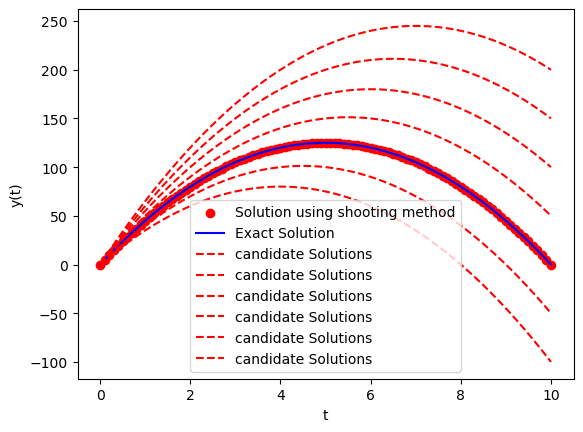

So, using np.argmin we get v0 = 49.98989898989898


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

# Define the function representing the system of first-order differential equations
def f(t, x, v):
    g = 10  # acceleration due to gravity
    dxdt = v
    dvdt = -g
    return dxdt, dvdt

# Implement the shooting method
def Candidate_Soln(x0, v0, t1, h):
    # Initialize time array
    t_values = np.arange(0, t1 + h, h)

    # Initialize arrays to store x and v values
    x_values = np.zeros(len(t_values))
    v_values = np.zeros(len(t_values))

    # Set initial conditions
    x_values[0] = x0
    v_values[0] = v0

    # Define a function to solve the initial value problem using 4th-order Runge-Kutta method
    def runge_kutta_4th_order_step(t, x, v, h):
        k1x, k1v = f(t, x, v)
        k2x, k2v = f(t + h / 2, x + h / 2 * k1x, v + h / 2 * k1v)
        k3x, k3v = f(t + h / 2, x + h / 2 * k2x, v + h / 2 * k2v)
        k4x, k4v = f(t + h, x + h * k3x, v + h * k3v)

        x_new = x + h / 6 * (k1x + 2 * k2x + 2 * k3x + k4x)
        v_new = v + h / 6 * (k1v + 2 * k2v + 2 * k3v + k4v)
        
        return x_new, v_new

    # Perform the shooting method
    for i in range(len(t_values) - 1):
        x_values[i + 1], v_values[i + 1] = runge_kutta_4th_order_step(t_values[i], x_values[i], v_values[i], h)

    return [t_values, x_values]

# Define initial conditions and parameters
x0 = 0  # initial position
t1 = 10  # end time
h = 0.1  # step size

def shooter(v0):
    return(Candidate_Soln(x0, v0, t1, h)[-1][-1])
a = 0
b = 200
root = bisect(shooter,a,b)
print(root)
plt.scatter(Candidate_Soln(x0, root, t1, h)[0],Candidate_Soln(x0, root, t1, h)[1],color='red', label = "Solution using shooting method")
# Exact solution for comparison
def exact_solution(t):
    return 50*t - 0.5 * 10 * t**2

# Plot the exact solution
t_exact = np.linspace(0, t1, 100)
x_exact = exact_solution(t_exact)
plt.plot(t_exact, x_exact, label='Exact Solution', color='blue')

# Plot candidate solutions
candidate_V = [40,45,55,60,65,70]
for i in range(len(candidate_v)):
    plt.plot(Candidate_Soln(x0, candidate_V[i], t1, h)[0],Candidate_Soln(x0, candidate_V[i], t1, h)[1],"--",color='red',label = "candidate Solutions")

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()

#### TO FIND THE TRUE V0 WE CAN USE THE np.argmin FUNCTION. The form is given below.

testv0 = np.linspace(0,101,100)
array = []
for i in range(len(testv0)):
    array.append(abs(shooter(testv0[i])))
arg = np.argmin(array)
truev0 = testv0[arg]
print("So, using np.argmin we get v0 =", truev0)
